In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# Read a color image
img = cv2.imread('input.png')
h, w, ch = img.shape
print(h, w, ch)

768 512 3


# Color Conversion

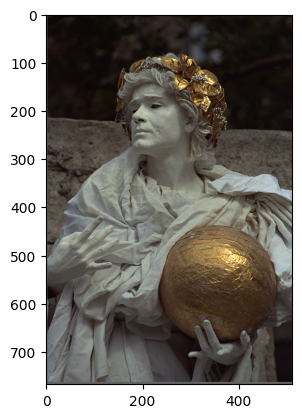

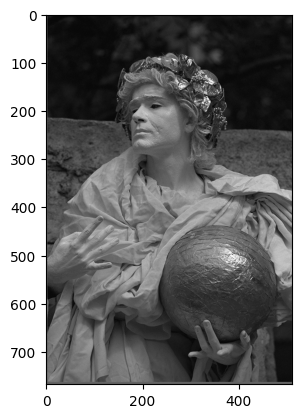

In [3]:
# Color conversion (The OpenCV default color format is BGR)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#cv2.imwrite('input_r.png', rgb[:, :, 0])
#cv2.imwrite('input_g.png', rgb[:, :, 1])
#cv2.imwrite('input_b.png', rgb[:, :, 2])
#cv2.imwrite('input_y.png', yuv[:, :, 0])

# plot image with matplotlib
plt.figure(0)
plt.imshow(rgb)
plt.figure(1)
plt.imshow(yuv[:,:,0],cmap='gray')

# Histogram Equalizatin

In [4]:
# Example: histogram equalization
img_y = yuv[:, :, 0]

hist, bins = np.histogram(img_y.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

Text(0.5, 1.0, 'Before Histogram Equalization')

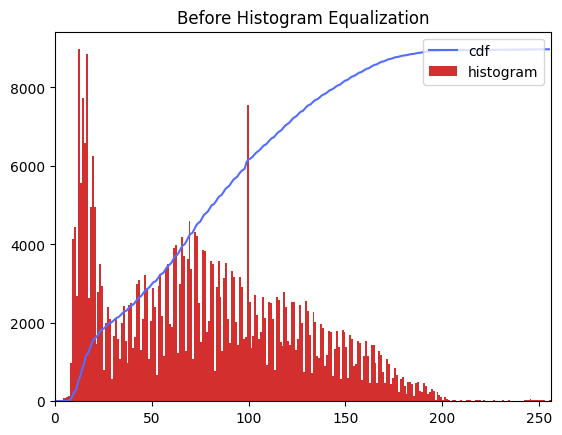

In [5]:

plt.plot(cdf_normalized, color = '#536dfe')
plt.hist(img_y.flatten(), 256, [0, 256], color = '#d32f2f')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper right')
plt.title('Before Histogram Equalization')

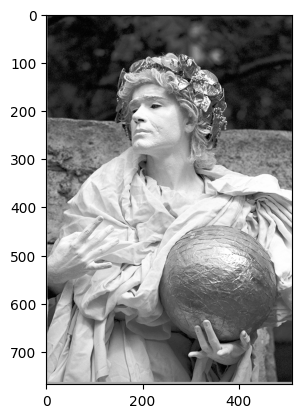

In [6]:
img_y_histeq = cv2.equalizeHist(img_y)
#cv2.imwrite('input_y_histeq.png', img_y_histeq)
plt.imshow(img_y_histeq,cmap='gray')

Text(0.5, 1.0, 'After Histogram Equalization')

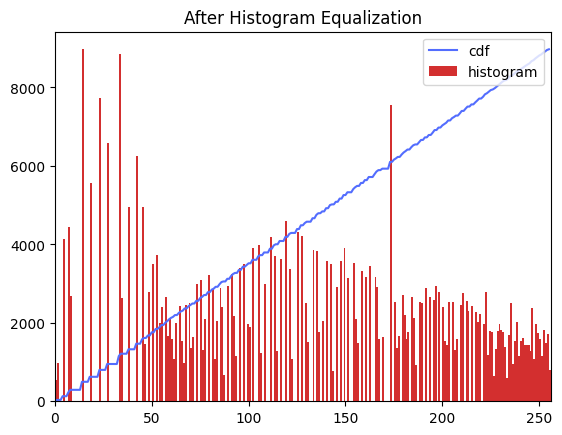

In [7]:
hist, bins = np.histogram(img_y_histeq.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()


plt.plot(cdf_normalized, color = '#536dfe')
plt.hist(img_y_histeq.flatten(), 256, [0, 256], color = '#d32f2f')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper right')
plt.title('After Histogram Equalization')

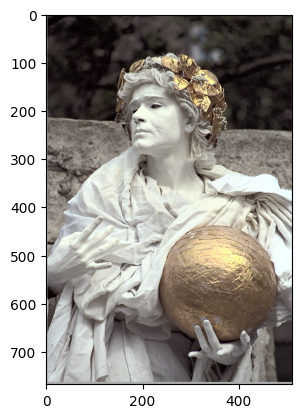

In [8]:
yuv[:, :, 0] = img_y_histeq
# convert to BGR
img_enhanced = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
#cv2.imwrite('input_y_enhanced.png', img_enhanced)
# convert to RGB
plt.imshow(img_enhanced[:,:,::-1])

# Filtering

Text(0.5, 1.0, 'Bilateral Filter (25, 9)')

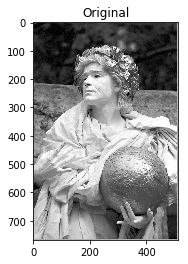

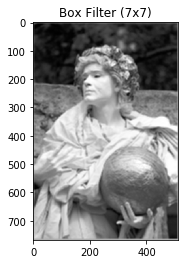

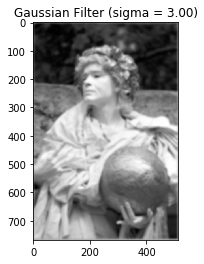

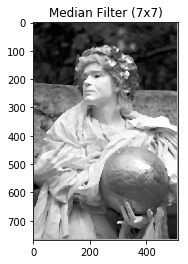

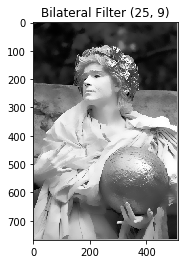

In [10]:
# Example: filtering
plt.figure(3)
plt.imshow(img_y, cmap = 'gray')
plt.title('Original')

output = cv2.boxFilter(img_y, -1, (7, 7))
plt.figure(4)
plt.imshow(output, cmap = 'gray')
plt.title('Box Filter (7x7)')

sigma = 3.0
radius = int(3*sigma)
ksize = 2*radius + 1
output = cv2.GaussianBlur(img_y, (ksize, ksize), sigma)
plt.figure(5)
plt.imshow(output, cmap = 'gray')
plt.title('Gaussian Filter (sigma = %.2f)' % sigma)

output = cv2.medianBlur(img_y, 7)
plt.figure(6)
plt.imshow(output, cmap = 'gray')
plt.title('Median Filter (7x7)')

output = cv2.bilateralFilter(img_y, -1, 25, 9)
plt.figure(7)
plt.imshow(output, cmap = 'gray')
plt.title('Bilateral Filter (25, 9)')

# Edge Detection

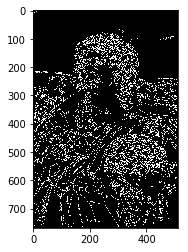

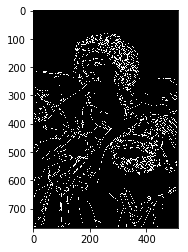

In [14]:
# Example: edge detection
edges = cv2.Canny(img_y_histeq, 50, 200)
#cv2.imwrite('edges.png', edges)
plt.figure(0)
plt.imshow(edges,cmap='gray')

sigma = 1.0
radius = int(3*sigma)
ksize = 2*radius + 1
output = cv2.GaussianBlur(img_y_histeq, (ksize, ksize), sigma)
edges = cv2.Canny(output, 50, 200)
plt.figure(1)
plt.imshow(edges,cmap='gray')